In [1]:
%%capture
!pip install contractions
!pip install textstat

In [2]:
import numpy as np
import pandas as pd
import regex as re
import os

import contractions
import urllib.parse

from tabulate import tabulate
from collections import defaultdict, Counter
from termcolor import colored, cprint

import nltk
from nltk.util import ngrams
from wordcloud import WordCloud
import textstat

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

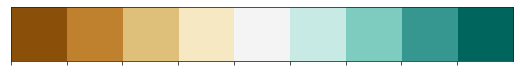

In [3]:
# Set font size
plt.rcParams.update({'font.size': 12})

# Set seaborn plot axis style
sns.set_style('ticks')

# Set color pallete
PAL = sns.color_palette('BrBG', 9)
sns.palplot(PAL)

## <a id="train">Training Set</a>

---

In [4]:
train_df = pd.read_csv('../input/commonlitreadabilityprize/train.csv')
train_df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [5]:
test_df = pd.read_csv('../input/commonlitreadabilityprize/test.csv')
test_df.head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


In [6]:
import math
def plot_stats(df, features, target, clr=[0,8]):

    # Mean values
    means = {}
    for feat in features:
        means[feat] = round(df[feat].mean())

    # Create figure
    n_rows = math.ceil(len(features)/2)
    n_cols = 4
    fig = plt.figure(figsize=(n_cols * 7, n_rows * 7))
    fig.patch.set_facecolor(PAL[4])

    # Define grid and subplots
    grid = plt.GridSpec(n_rows, n_cols)
    col=0
    row=0
    for  (feat, mean) in (means.items()):
        title = feat.replace('_', ' ').title().replace(' Per ', ' per ')
        print(col)
        if col==4:
            col=0
            row+=1

        
        if col%2 == 0:
            ax = plt.subplot(grid[row, col])
            sns.histplot(
                df[feat],
                color=PAL[clr[1]],
                alpha=0.8,
                bins=10,
                ax=ax,
                label=title.lower(),
                kde=True,
            )
            ax.axvline(
                mean,
                color=PAL[clr[0]],
                linestyle='--',
                linewidth=2,
                label=f'mean: {mean}',
            )
            ax.legend(loc='upper right')
            ax.set_xlabel(title)
            ax.set_ylabel('Excerpt Count')
            ax.set_title(
                title,
                fontsize=20,
                fontweight='bold',
                fontfamily='serif'
            )
            col+=1

        if col%2 == 1:
            ax = plt.subplot(grid[row, col])
            sns.regplot(
                df[feat],
                df[target],
                order=1,
                color=PAL[clr[1]],
                line_kws={'color': PAL[clr[0]]},
                scatter_kws={'alpha': 0.3},
                ax=ax,
            )
            ax.set_xlabel(title)
            ax.set_ylabel(target.capitalize())
            ax.set_title(
                f'{target.capitalize()} vs {title}',
                fontsize=20,
                fontweight='bold',
                fontfamily='serif',
            )
            col+=1

        

    plt.show()

In [7]:
def get_stat(df, col):
    df['flesch_reading_ease'] = df[col].apply(lambda x: textstat.flesch_reading_ease(x))
    df['flesch_kincaid_grade'] = df[col].apply(lambda x: textstat.flesch_kincaid_grade(x))
    df['gunning_fog'] = df[col].apply(lambda x: textstat.gunning_fog(x))
    df['automated_readability_index'] = df[col].apply(lambda x: textstat.automated_readability_index(x))
    df['coleman_liau_index'] = df[col].apply(lambda x: textstat.coleman_liau_index(x))
    df['linsear_write_formula'] = df[col].apply(lambda x: textstat.linsear_write_formula(x))
    df['dale_chall_readability_score'] = df[col].apply(lambda x: textstat.dale_chall_readability_score(x))
    return df

0
2
4
2
4
2
4


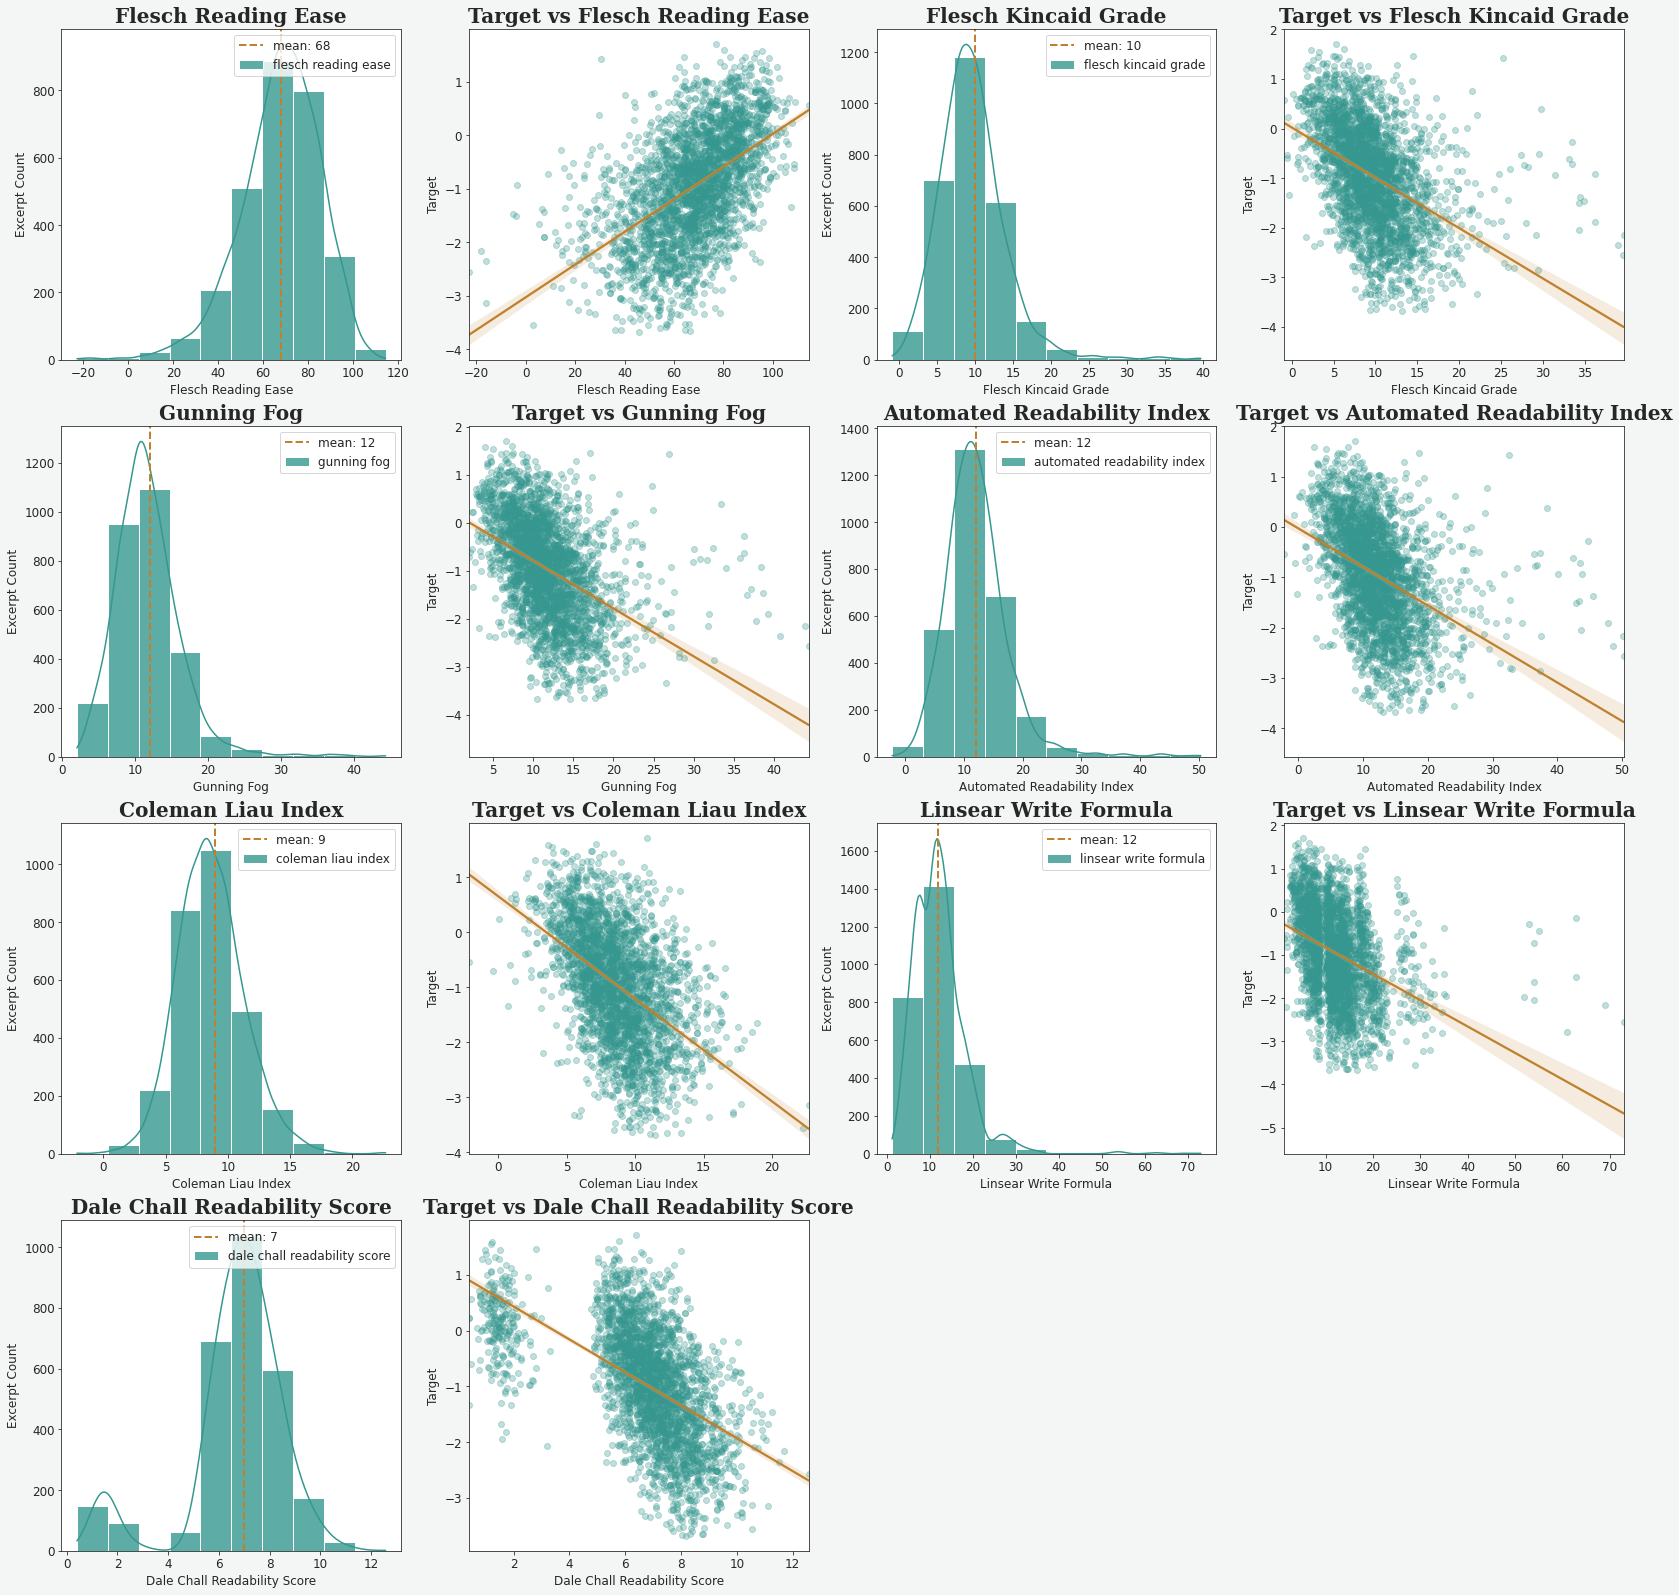

In [11]:
train_df = get_stat(train_df, 'excerpt')
textstat_features = train_df.columns[-7:].tolist()
plot_stats(train_df, textstat_features, 'target', clr=[1, 7])